In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [25]:
 df = pd.read_csv('hotel_booking.csv')
# Read the hotel_booking.csv file and assign it to the df variable

In [26]:
df.head()
# Display the first few rows of the dataframe

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [27]:
df.tail()
# Display the few rows from last of the dataframe

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [28]:
# Remove personal information of customers like credit_card , phone-number, email, name are of no use for analysis. Thus , dropping these columns
df = df.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1)

In [29]:
# Check all the column names of the dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [30]:
# Check the no. of rows & columns in the dataset
df.shape

(119390, 32)

In [31]:
df.info()
# Check the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [32]:
# Change reservation_status_date data type from 'object' to 'datetime'
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [33]:
# Summary status for columns with 'object' data type
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [34]:
# Get unique values for each column having 'object' data type and then give space after every output
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('  ')

hotel
['Resort Hotel' 'City Hotel']
  
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
  
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
  
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 

In [35]:
# Check for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [36]:
# Remove the column 'agent' because it is not required in the analysis
# Remove the column 'company' because the no. of null values are too large
df.drop(['agent', 'company'], axis=1, inplace=True)


In [37]:
#Remove the rows where the columns 'children' & 'country' have null values as the no. of rows are too small compared to the dataset and will not impact the analysis
df.dropna(inplace = True)

# Statistical Analysis of Data 

In [38]:
# Summary of numerical columns
df.describe().T
#.T at the end transposes the result, so the columns become rows and vice versa. This makes the output more readable

,count,mean,std,min,25%,50%,75%,max
is_canceled,118898.0,0.371352,0.483168,0.00,0.0,0.0,1.0,1.0
lead_time,118898.0,104.311435,106.903309,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118898.0,2016.157656,0.707459,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118898.0,27.166555,13.589971,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118898.0,15.800880,8.780324,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118898.0,0.928897,0.996216,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118898.0,2.502145,1.900168,0.00,1.0,2.0,3.0,41.0
adults,118898.0,1.858391,0.578576,0.00,2.0,2.0,2.0,55.0
children,118898.0,0.104207,0.399172,0.00,0.0,0.0,0.0,10.0
babies,118898.0,0.007948,0.097380,0.00,0.0,0.0,0.0,10.0


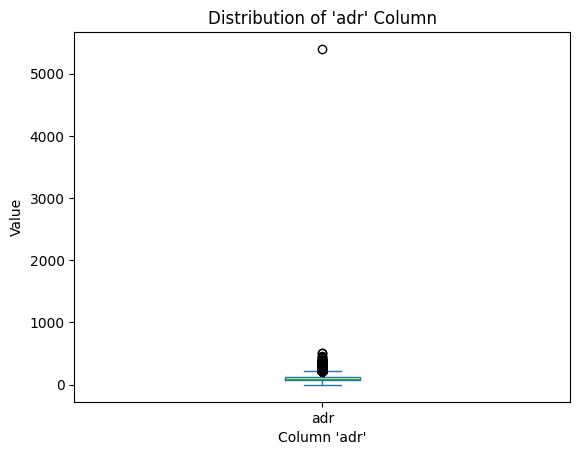

In [39]:
# The column 'adr' has an outlier value of 5400
df['adr'].plot(kind = 'box')

plt.title("Distribution of 'adr' Column")
plt.xlabel("Column 'adr'")
plt.ylabel("Value")
plt.show()

In [40]:
# Remove the outlier value as to get accuracy and reliability of statistical analyses and visualizations
df = df[df['adr']<5000]

# To check whether the data is updated in adr Column is updated
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118897.0,0.371347,0.483167,0.00,0.0,0.0,1.0,1.0
lead_time,118897.0,104.312018,106.903570,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118897.0,2016.157657,0.707462,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118897.0,27.166674,13.589966,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118897.0,15.800802,8.780321,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118897.0,0.928905,0.996217,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118897.0,2.502157,1.900171,0.00,1.0,2.0,3.0,41.0
adults,118897.0,1.858390,0.578578,0.00,2.0,2.0,2.0,55.0
children,118897.0,0.104208,0.399174,0.00,0.0,0.0,0.0,10.0
babies,118897.0,0.007948,0.097381,0.00,0.0,0.0,0.0,10.0


# Data Analysis & Visualizations


0    62.865337
1    37.134663
Name: is_canceled, dtype: float64


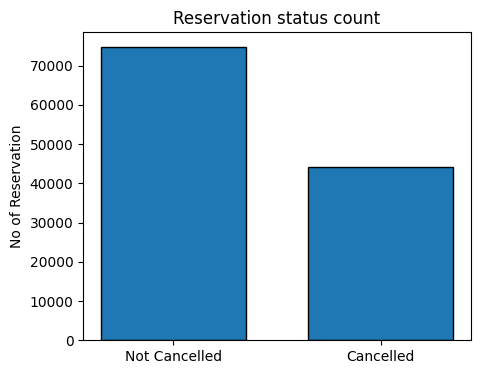

In [41]:
# Calculate the percentage of cancelled reservations
cancelled_parcentage = df['is_canceled'].value_counts(normalize = True)
print(cancelled_parcentage*100)


# Plot the reservation status count for better understading 
plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not Cancelled','Cancelled'],df['is_canceled'].value_counts(),edgecolor='black',width= 0.7)
plt.ylabel('No of Reservation')
plt.show()

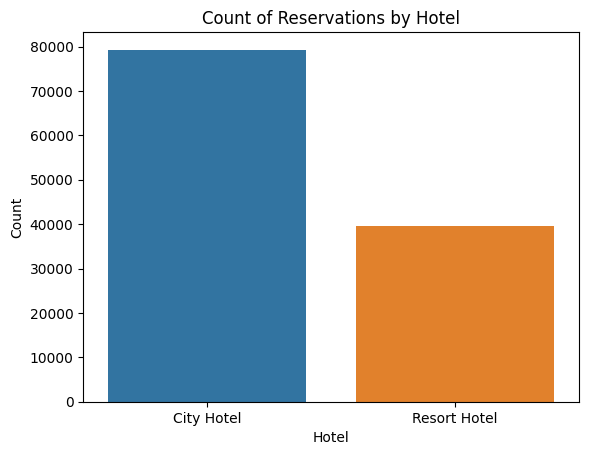

In [42]:
# Calculate the count of reservations by hotel
d = df.groupby('hotel')['hotel'].count()

# Plot a bar chart
sns.barplot(x=d.index, y=d)


plt.xlabel('Hotel')
plt.ylabel('Count')
plt.title('Count of Reservations by Hotel')
plt.show()


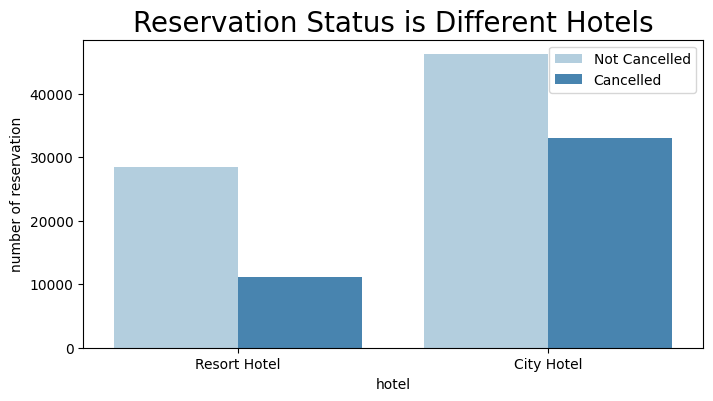

In [43]:
# Plot the bookings for each hotel
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x = 'hotel',hue = 'is_canceled', data = df, palette = 'Blues')

#retrieves the legend handles and labels from the countplot and assigns them to the variables
legend_labels,_ = ax1.get_legend_handles_labels()

#used to position the legend at the top-right corner of the plot.
ax1.legend(bbox_to_anchor=(1, 1))

plt.title('Reservation Status is Different Hotels',size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservation')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()

In [44]:
# Get the data of Resort Hotel in a different dataframe
resort_hotel = df[df['hotel'] == 'Resort Hotel']

# Get the percentage of cancelled bookings in Resort Hotel
cancelled_perc = resort_hotel['is_canceled'].value_counts(normalize = True)
print(cancelled_perc*100)

0    72.024952
1    27.975048
Name: is_canceled, dtype: float64


### From this analysis, we find that Resort Hotel has 28% cancellations and City Hotel has 42% cancellations

In [45]:
# Get the data of City Hotel in a different dataframe
city_hotel = df[df['hotel'] == 'City Hotel']

# Get the percentage of cancelled bookings in City Hotel
cancelled_perc= city_hotel['is_canceled'].value_counts(normalize = True)
print(cancelled_perc*100)

0    58.291825
1    41.708175
Name: is_canceled, dtype: float64


In [52]:
# Check if price has any effect on hotel cancellations, so get average daily rate(adr) for each day
#grouping the data into seperate dataframes
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

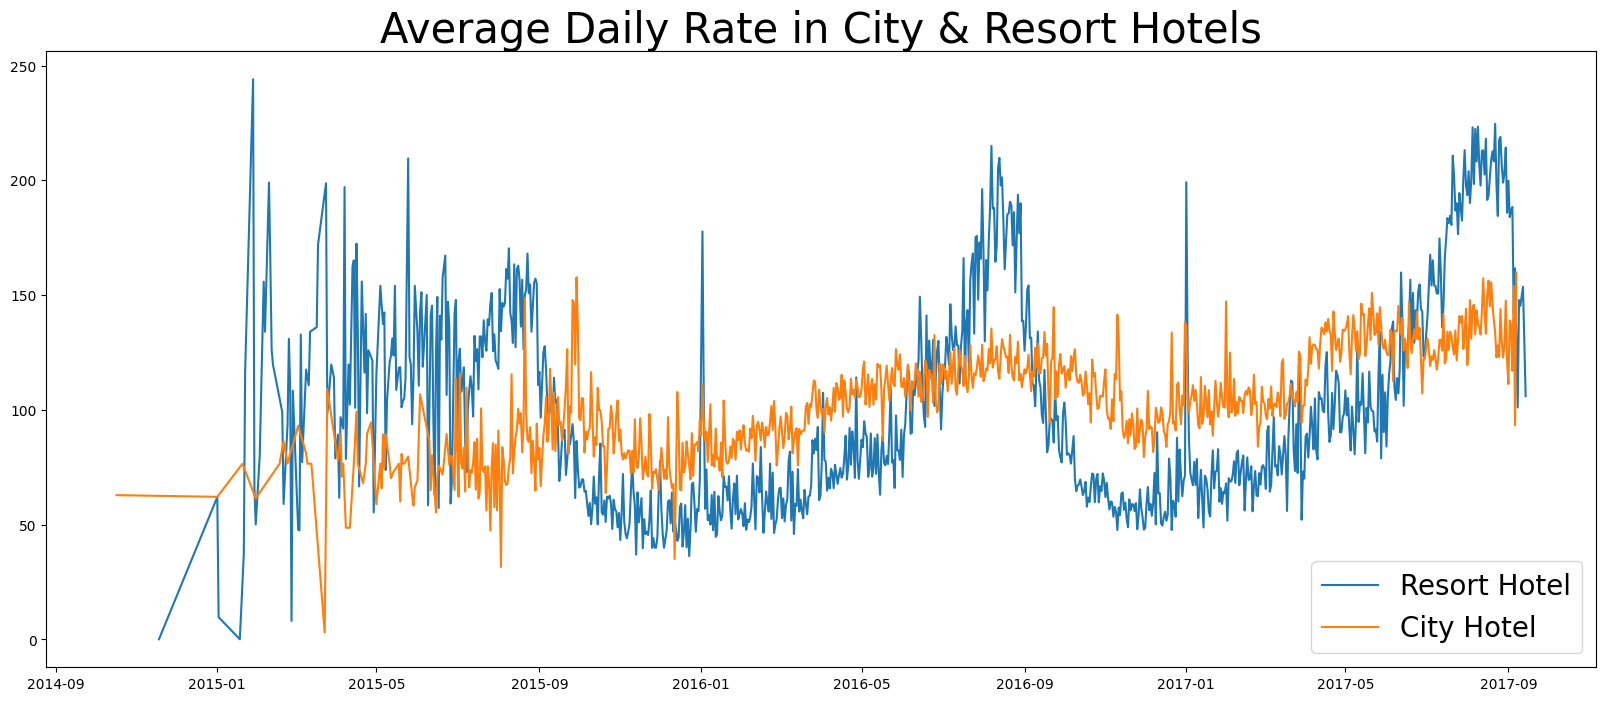

In [54]:
# Create visualization for above calculated data to check if our Hypothesis-1 is correct or not
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City & Resort Hotels', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

### ADR(Average daily rate) of 2016 year was at constant scale and not fluctuating

In [56]:
#get the years when the customers visited the hotels
df['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

Text(0.5, 1.0, 'Reservations in year')

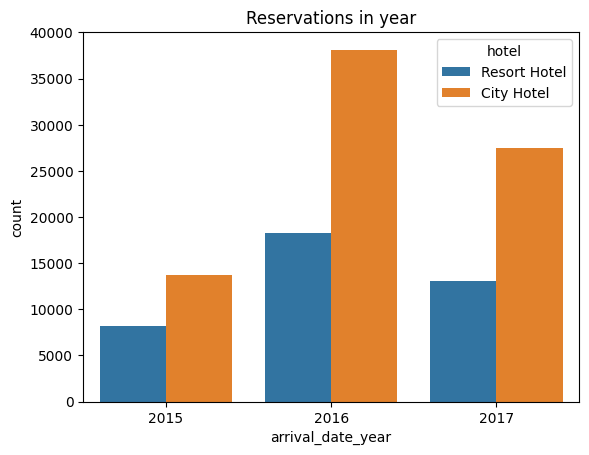

In [57]:
# Plot count of hotel bookings by arrival year
sns.countplot(x='arrival_date_year', hue='hotel', data=df)
plt.title("Reservations in year")

### This shows that maximum reservation in city and resort hotels were in year 2016 when ADR was not increasing and remained almost same throughout the year

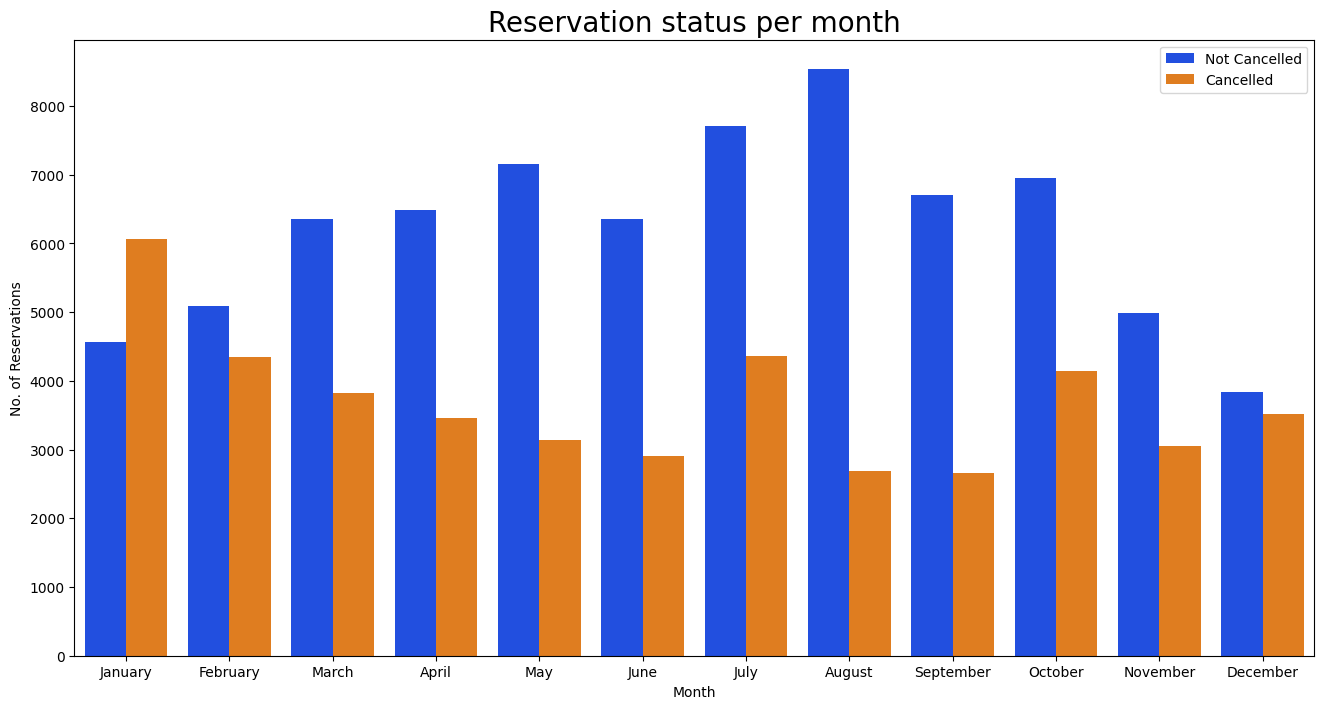

In [83]:
# Find out the month with maximum reservations & cancellations
plt.figure(figsize = (16,8))

# Create new column for month
df['month'] = df['reservation_status_date'].dt.month

# Define month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'bright')

#retrieves the legend handles and labels from the countplot and assigns them to the variables
legend_labels,_ = ax1.get_legend_handles_labels()

#used to position the legend at the top-right corner of the plot.
ax1.legend(bbox_to_anchor = (1,1))

#giving labelling to bar graph
plt.title('Reservation status per month', size = 20)
plt.xlabel('Month')
plt.ylabel('No. of Reservations')
plt.legend(['Not Cancelled', 'Cancelled'])


# Modify x-axis labels to show month names
plt.xticks(ticks=range(0,12), labels=month_names)
plt.show()

### Most cancellations are in January and least cancellations are in August & September.



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


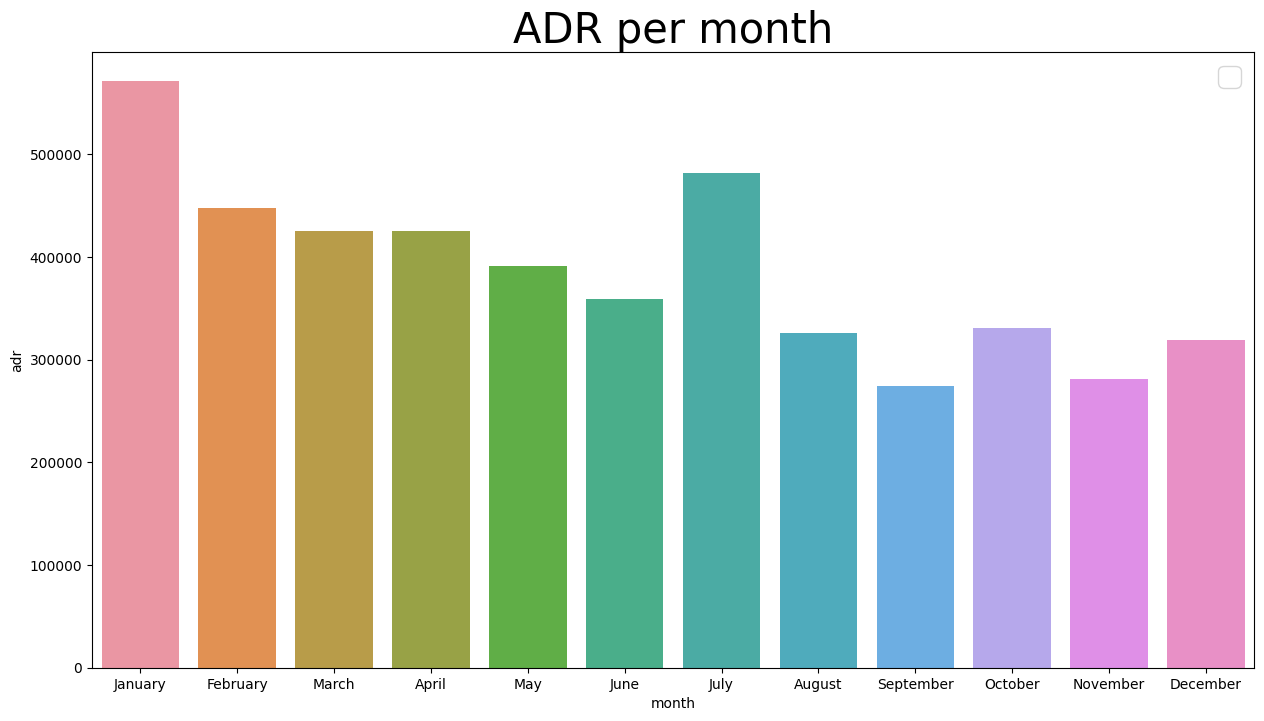

In [84]:
# Check the price for each month for cancelled bookings data
plt.figure(figsize=(15, 8))
plt.title('ADR per month', fontsize=30)
# Define month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
           
# Modify x-axis labels to show month names
plt.xticks(ticks=range(0,12), labels=month_names)
            
plt.legend(fontsize=20)
plt.show()

### Price is highest in January and Price is lowest in August to December. This data correlates to the no. of cancellations per month.

Text(0.5, 1.0, 'Booked Hotel type by country')

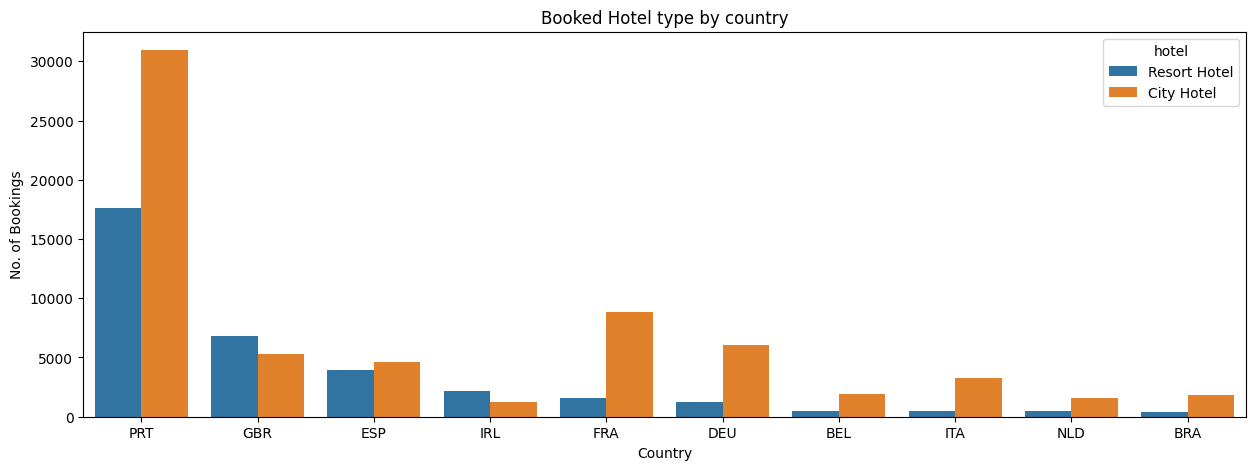

In [89]:
#check booking rates for top 10 country

# Data frame for cancelled reservations
cancelled_data = df[df['is_canceled'] == 1]  

# Countries which are the top 10 in count
top_10_countries = df['country'].value_counts().sort_values(ascending=False)[:10]
plt.figure(figsize=(15,5))
sns.countplot(x='country', hue='hotel', data=df[df['country'].isin(top_10_countries.index)])
plt.xlabel("Country")
plt.ylabel("No. of Bookings")
plt.title("Booked Hotel type by country")

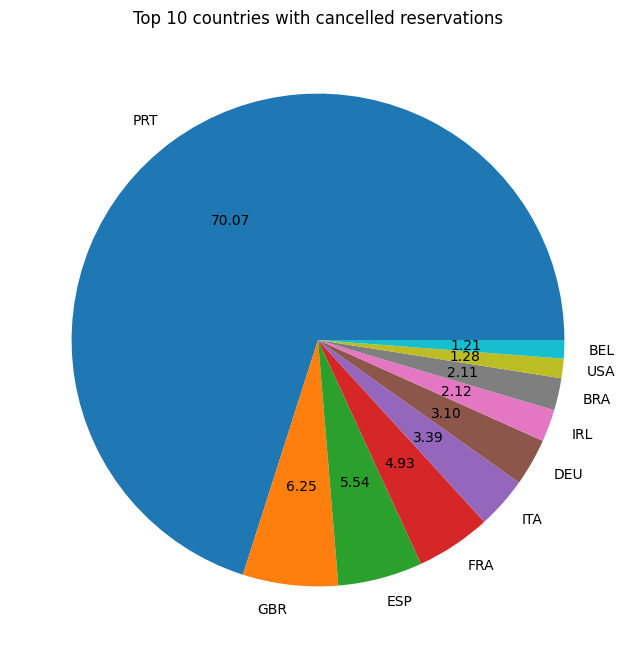

In [91]:
# Check cancellation rates per country
# Create pie chart to show the data for these 10 countries
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with cancelled reservations')
plt.pie(top_10_countries, autopct = '%.2f', labels = top_10_countries.index)  # Pie chart with data upto 2 decimal places
plt.show()

### Portugal (or PRT) has the most number of booking in hotels and most cancellations, which is about 70.1 %

### So, the hotels need to run campaigns, do promotions & marketing and provide better facilities in their branches located in Portugal, to avoid there major cancellation.

In [95]:
# Check the customer percentage count for companies the customers are coming from
total_customers=df['market_segment'].value_counts(normalize= True)
print(total_customers*100)

Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: market_segment, dtype: float64


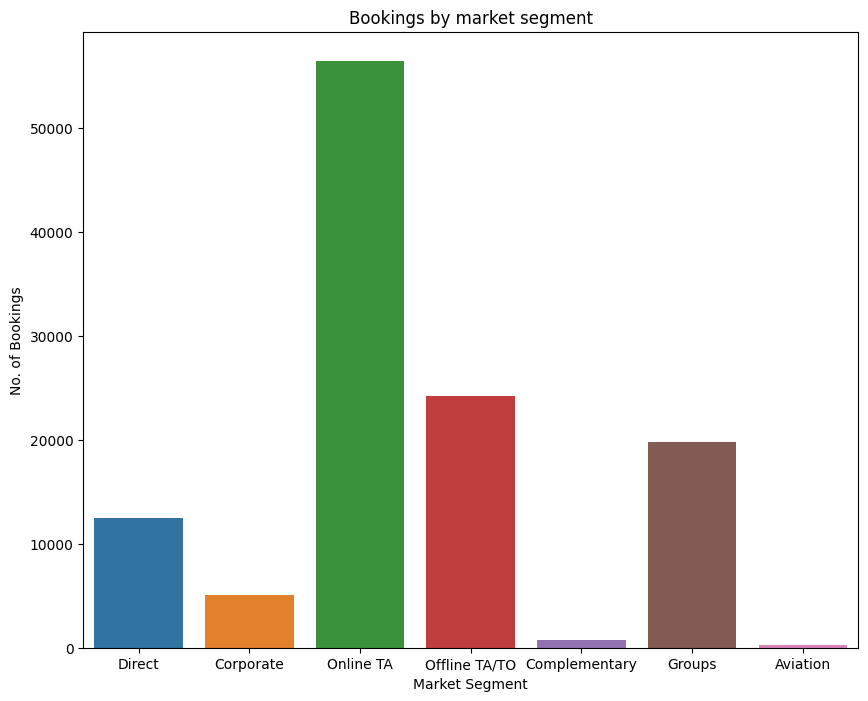

In [110]:
#to visualize the number of bookings by market segment
plt.figure(figsize=(10,8))
sns.countplot(x='market_segment', data=df[df['market_segment'].isin(total_customers.index)])
plt.title("Bookings by market segment")
plt.xlabel("Market Segment")
plt.ylabel("No. of Bookings")

plt.show()

In [112]:
#check the customers cancelling percentage data from the respective market segment they are coming 
cancelled_perc = cancelled_data['market_segment'].value_counts(normalize =True)
print(cancelled_perc*100)

Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: market_segment, dtype: float64


### Around 47% of the customers are coming from Online agents and only 20% are coming from offline agents.So, we can confirm that bookings from offline agents is not a reason for the increase in cancellations

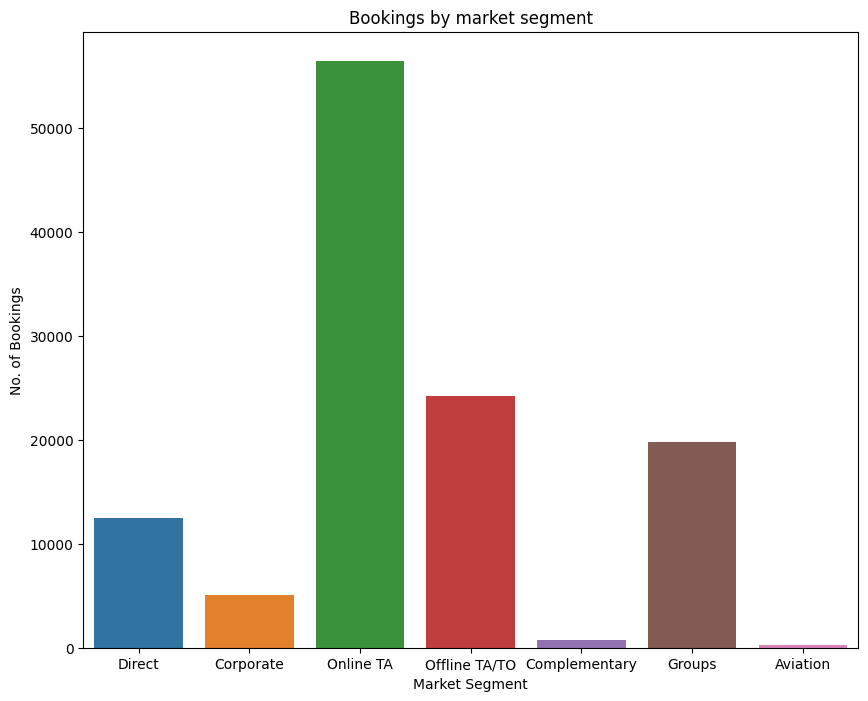

In [113]:
#to visualize the number of cancellations by market segment
plt.figure(figsize=(10,8))
sns.countplot(x='market_segment', data=df[df['market_segment'].isin(cancelled_perc.index)])
plt.title("Bookings by market segment")
plt.xlabel("Market Segment")
plt.ylabel("No. of Bookings")

plt.show()

### Around 47% of the customers are coming from Online agents and only 20% are coming from offline agents.So, we can confirm that bookings from offline agents is not a reason for the increase in cancellations